**Due Date: Monday, February 5th, 11:59pm**

- Save a copy of the notebook to your Google Drive. You can do that by going to the menu and clicking `File` > `Save` > `SAVE A COPY IN DRIVE`.
- Fill out the missing parts and run the code modules.
- Answer the questions (if any) in a separate document or by adding a new `Text` block inside the Colab.
- Download the solved notebook by going to the menu and clicking `File` > `Download .ipynb`.
- Make sure the downloaded version is showing your solutions.
- Upload your solutions to BruinLearn (under "Colab Assignment #3: Linear Regression" in Assignments).

In [9]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

np.random.seed(0)

Download the data for house prices.

In [10]:
!wget -O house_prices.csv https://www.dropbox.com/s/v14nl9kcgqoqn36/house_prices.csv?dl=0

--2024-02-05 23:16:42--  https://www.dropbox.com/s/v14nl9kcgqoqn36/house_prices.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/v14nl9kcgqoqn36/house_prices.csv [following]
--2024-02-05 23:16:44--  https://www.dropbox.com/s/raw/v14nl9kcgqoqn36/house_prices.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce4478f5ae2d047f479cd36b60c.dl.dropboxusercontent.com/cd/0/inline/CMtwu0Cr3e5Du5prLoDFcSCy8rTXDlzVYcWTaDn4hRXelaYOg4qhmF7GS2WZmvXBng8ay69LTB6IVOoOnROhRVYPSokbaCcQv23J8QFRaSPSw-n1dmPQTdS53RNC3z-5jcc/file# [following]
--2024-02-05 23:16:45--  https://uce4478f5ae2d047f479cd36b60c.dl.dropboxusercontent.com/cd/0/inline/CMtwu0Cr3e5Du5prLoDFcSCy8rTXDlzVYcWTaDn4hRXelaYOg4qhmF7GS2WZmvXBng8ay69LTB6IVOoOnROhRVYPSokbaCcQv23J8QF

Load house prices data into a Pandas data frame.

In [11]:
prices_data = pd.read_csv("house_prices.csv")

print("The first three rows of the data are:")
prices_data.head(3)

The first three rows of the data are:


,house_type,sqft,age,price
0,condominium,1380.0,1.873884,231430.0
1,townhouse,2137.0,0.655100,276776.0
2,condominium,1639.0,22.591568,199513.0


Print summary statistics for the data.

In [12]:
prices_data.describe()

,sqft,age,price
count,200.000000,200.000000,200.000000
mean,1721.690000,42.100913,254548.075000
std,423.824539,35.277504,62757.260134
min,767.000000,0.270202,110380.000000
25%,1443.750000,16.022210,212453.750000
50%,1678.500000,34.432747,249524.500000
75%,2021.750000,59.732957,289058.750000
max,2927.000000,148.107500,472792.000000


##Simple Linear Regression

Using linear regression study the relationship between the square footage of houses in our data and their average price.

1.   Use `LinearRegression` method in `scikit-learn` to fit a linear regression

In [13]:
x = prices_data[['sqft']]
y = prices_data.price

# TODO: Fit a linear regression to x and y
model = LinearRegression()
model.fit(x, y)
# END OF TODO

LinearRegression()

2. Gather the estimated coefficients from the model.

In [14]:
# TODO: Assign correct values to intercept and sqft_est_coef
intercept = model.intercept_
sqft_est_coef = model.coef_[0]
# END OF TODO

print("intercept of the model is: ", intercept)
print("coefficient of square footage is: ", sqft_est_coef)

intercept of the model is:  146762.72091842652
coefficient of square footage is:  62.60439108177052


3. How can we interpret the coeffient of the square footage?

We can interpret the coefficient of square footage as the slope of the linear regression model. In this case, it represents a 62.6 unit increase in price for every 1 unit increase in square footage of house.  

4. Compute the residual sum of squares from the model.

In [15]:
# TODO: Assign correct value to rss
y_hat = model.predict(x)
residuals = y - y_hat
rss = np.sum(residuals**2)
# END OF TODO

print("RSS for the model is: ", rss)

RSS for the model is:  643657321143.4912


##Multiple Linear Regression

Using linear regression study the relationship between the features in our data and the average price.

1.   Divide features and the response variable into different objects.

In [23]:
# TODO: Assign features to X and the outcome to y
X = prices_data[['sqft', 'age']]
y = prices_data.price
# END OF TODO

2. Add indicator variables for house type into the  data frame of the features.

In [24]:
# TODO: Update X
prices_data_one_hot_encoded = pd.get_dummies(
    prices_data,
    columns = ["house_type"],
    drop_first = True
)
X = prices_data_one_hot_encoded.drop("price", axis = 1)
# END OF TODO

if isinstance(X, pd.DataFrame):
  print(X.head(3))

     sqft        age  house_type_sfh  house_type_townhouse
0  1380.0   1.873884               0                     0
1  2137.0   0.655100               0                     1
2  1639.0  22.591568               0                     0


3. Add age squared as a new feature to the data frame of the features.

In [25]:
# TODO: Update X
X = X.assign(age_sqr = X.age**2)
# END OF TODO

if isinstance(X, pd.DataFrame):
  print(X.head(3))

     sqft        age  house_type_sfh  house_type_townhouse     age_sqr
0  1380.0   1.873884               0                     0    3.511440
1  2137.0   0.655100               0                     1    0.429156
2  1639.0  22.591568               0                     0  510.378927


4. Apply a linear regression using `OLS` method in `statsmodels`. Don't forget to add an intercept column to the features using `sm.add_constant`.

In [26]:
# TODO: fit the model
X_with_intercept = sm.add_constant(X)
model = sm.OLS(y, X_with_intercept).fit()
# END OF TODO

if isinstance(model, sm.regression.linear_model.RegressionResultsWrapper):
  print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     18.14
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           9.39e-15
Time:                        23:39:12   Log-Likelihood:                -2454.3
No. Observations:                 200   AIC:                             4921.
Df Residuals:                     194   BIC:                             4940.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.035e+05 

5. From the model summary, what is the estimated coefficient for square footage (i.e., $\hat{\beta}_{\text{sqft}}$)? Can we confidently say that the real coefficient of square footage (i.e., $\beta_{\text{sqft}}$) is positive? How do you interpret the estimated coefficient?

The estimated coefficient for square footage is 31.1996, so 1 unit increase in square footage results in a 31.1996 unit increase in price given that all other features remain the same (i.e. house type, age, age_sqr, etc.). We can confidently say the real coefficient of square footage would be postive because that matches up with our expected result based on logic of house prices.

6. What is the R-squared of the model?

R-squared is given as 0.319

7. Compute the fitted values and the residuals for the model, and plot residuals vs. fitted values. Does the plot show any obvious issues with the model?

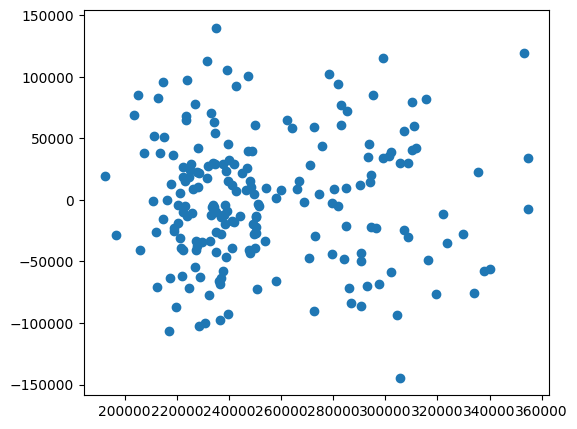

In [28]:
# TODO: Assign correct values to y_hat and residuals
y_hat = model.predict(X_with_intercept)
residuals = y - y_hat
# END OF TODO

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(6,5))
_ = ax.scatter(y_hat, residuals)